# Capstone Project kick-off

© Wendy Doan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn import preprocessing

# I. Getting price data through Yahoo Finance

In [4]:
# Note: From full list, delete the following: 
# No data overall
# ALXN, BF.B, BRK.B, VAR, LB, FLIR
# No train data
# CARR, OTIS, FOX, DOW, CTVA, VNT, FOXA

# [TO DO]
# Check these tickers to see what happened? Are they new? Or is this missing data from yfinance?

with open("data/sp500_tickers.txt", "r") as file_object:
    sp500_tickers = file_object.read()

## I.1 Stock price data

In [5]:

downloading_ticker_data = False


if downloading_ticker_data:
    print("Downloading train data ... \n")
    price_train = yf.download( 
        tickers = sp500_tickers, start = "2011-10-01", end = "2018-10-01", group_by = 'column'
    )
    
    price_train = price_train['Adj Close'].transpose() 
    price_train.to_csv('data/sp500_price_train.csv')   
    print("\n")
    
    print("Downloading test data ... \n")
    price_test = yf.download( 
        tickers = sp500_tickers, start = "2018-10-02", end = "2021-10-01", group_by = 'column'
    )
    price_test = price_test['Adj Close'].transpose()
    price_test.to_csv('data/sp500_price_test.csv')  

else:
    price_train = pd.read_csv('data/sp500_price_train.csv', index_col=0)
    price_test = pd.read_csv('data/sp500_price_test.csv', index_col=0)

In [6]:
price_train.describe()

,10/3/2011,10/4/2011,10/5/2011,10/6/2011,10/7/2011,10/10/2011,10/11/2011,10/12/2011,10/13/2011,10/14/2011,...,9/17/2018,9/18/2018,9/19/2018,9/20/2018,9/21/2018,9/24/2018,9/25/2018,9/26/2018,9/27/2018,9/28/2018
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,456.000000,456.000000,...,489.000000,489.000000,490.000000,490.000000,489.000000,489.000000,489.000000,490.000000,490.000000,490.000000
mean,33.044868,33.985549,34.572864,35.290181,34.920743,36.144209,36.127878,36.490351,36.382526,37.014366,...,118.828168,119.606558,119.270268,120.004187,120.121308,119.716020,119.712543,119.061322,119.411245,119.351832
std,45.002797,45.764003,46.362659,46.898780,47.114235,48.796302,48.922869,49.180120,49.302556,50.096918,...,194.571022,197.208452,195.995921,196.950605,195.626654,195.971585,196.750034,195.914271,197.752068,195.969693
min,2.375597,2.509324,2.619451,2.879036,2.674514,2.831838,2.855437,3.004895,2.894768,2.910501,...,3.890000,4.360000,4.230000,4.420000,4.400000,4.210000,4.620000,4.540000,4.940000,4.850000
25%,15.284905,15.736032,16.101789,16.453772,16.120554,16.601488,16.591003,16.791450,16.695821,16.965609,...,47.105404,47.316933,46.906656,47.320219,47.540001,47.035351,46.525696,46.163328,46.293152,46.434793
50%,23.537739,24.249180,24.680000,25.164873,25.180000,25.760000,25.780001,25.949507,25.842670,26.192588,...,77.804291,77.681831,77.789680,78.579155,78.748451,78.449997,77.282875,77.086456,77.302471,76.956257
75%,37.494171,38.380266,38.584244,39.408890,38.822662,39.975420,39.843431,40.343414,40.142183,40.710632,...,129.285873,130.212006,130.376713,131.432259,131.375336,129.882111,129.820007,130.699356,130.838108,130.604298
max,575.280029,587.369995,603.000000,593.750000,607.700012,629.239990,626.200012,634.900024,632.000000,634.119995,...,2620.979980,2672.409912,2617.810059,2608.530029,2583.919922,2572.000000,2557.389893,2520.199951,2543.250000,2470.800049


In [7]:
price_test.describe()

,10/2/2018,10/3/2018,10/4/2018,10/5/2018,10/8/2018,10/9/2018,10/10/2018,10/11/2018,10/12/2018,10/15/2018,...,9/17/2021,9/20/2021,9/21/2021,9/22/2021,9/23/2021,9/24/2021,9/27/2021,9/28/2021,9/29/2021,9/30/2021
count,490.000000,490.000000,490.000000,490.000000,490.000000,489.000000,490.000000,490.000000,489.000000,490.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,118.924301,118.817576,117.526420,116.810376,116.552400,116.068411,112.056220,109.825853,111.506605,110.916016,...,202.409717,199.476058,199.302451,201.437540,203.650880,203.815865,202.717855,198.578367,198.862769,196.000106
std,195.198697,193.491177,189.893486,188.851506,189.094519,186.533699,179.758588,176.449887,178.966232,177.600157,...,381.790406,375.114689,375.672526,380.388988,381.971614,382.178372,380.133145,370.309875,370.451045,364.569694
min,4.990000,4.930000,4.640000,4.510000,4.630000,4.540000,4.330000,4.500000,4.600000,4.940000,...,11.850000,11.480000,11.410000,11.740000,11.820000,11.790000,11.870000,11.700000,11.730000,11.590000
25%,46.110926,46.436792,45.995871,45.970982,46.476419,46.659306,45.190722,44.230191,44.371490,44.181108,...,57.830002,56.959999,57.050541,57.479031,59.360001,59.743149,59.459999,59.139999,59.849998,58.650002
50%,77.416630,76.802677,76.389874,75.255466,74.990017,74.858604,72.593307,71.480347,72.843193,72.367535,...,114.000000,113.129997,113.379997,113.949997,115.559998,115.989998,116.599999,111.959999,113.129997,111.040001
75%,130.275002,131.847363,128.558041,129.059742,128.613113,127.949997,123.924513,122.535002,123.196808,122.676792,...,213.600006,210.130005,209.080002,212.020004,215.050003,214.589996,213.899994,210.509994,209.110001,206.630005
max,2479.760010,2423.500000,2388.649902,2401.580078,2447.820068,2373.469971,2349.290039,2272.879883,2246.659912,2234.000000,...,5070.740234,4968.149902,4966.720215,5017.450195,4977.339844,4952.959961,4987.310059,4885.959961,4942.250000,4794.080078


In [8]:
price_test.describe()

,10/2/2018,10/3/2018,10/4/2018,10/5/2018,10/8/2018,10/9/2018,10/10/2018,10/11/2018,10/12/2018,10/15/2018,...,9/17/2021,9/20/2021,9/21/2021,9/22/2021,9/23/2021,9/24/2021,9/27/2021,9/28/2021,9/29/2021,9/30/2021
count,490.000000,490.000000,490.000000,490.000000,490.000000,489.000000,490.000000,490.000000,489.000000,490.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,118.924301,118.817576,117.526420,116.810376,116.552400,116.068411,112.056220,109.825853,111.506605,110.916016,...,202.409717,199.476058,199.302451,201.437540,203.650880,203.815865,202.717855,198.578367,198.862769,196.000106
std,195.198697,193.491177,189.893486,188.851506,189.094519,186.533699,179.758588,176.449887,178.966232,177.600157,...,381.790406,375.114689,375.672526,380.388988,381.971614,382.178372,380.133145,370.309875,370.451045,364.569694
min,4.990000,4.930000,4.640000,4.510000,4.630000,4.540000,4.330000,4.500000,4.600000,4.940000,...,11.850000,11.480000,11.410000,11.740000,11.820000,11.790000,11.870000,11.700000,11.730000,11.590000
25%,46.110926,46.436792,45.995871,45.970982,46.476419,46.659306,45.190722,44.230191,44.371490,44.181108,...,57.830002,56.959999,57.050541,57.479031,59.360001,59.743149,59.459999,59.139999,59.849998,58.650002
50%,77.416630,76.802677,76.389874,75.255466,74.990017,74.858604,72.593307,71.480347,72.843193,72.367535,...,114.000000,113.129997,113.379997,113.949997,115.559998,115.989998,116.599999,111.959999,113.129997,111.040001
75%,130.275002,131.847363,128.558041,129.059742,128.613113,127.949997,123.924513,122.535002,123.196808,122.676792,...,213.600006,210.130005,209.080002,212.020004,215.050003,214.589996,213.899994,210.509994,209.110001,206.630005
max,2479.760010,2423.500000,2388.649902,2401.580078,2447.820068,2373.469971,2349.290039,2272.879883,2246.659912,2234.000000,...,5070.740234,4968.149902,4966.720215,5017.450195,4977.339844,4952.959961,4987.310059,4885.959961,4942.250000,4794.080078


### Filling NAs

In [9]:
# [TO DO]:
# What to do with missing days? 
# What to do with stocks with less data

# For now, fill by stock mean price

In [10]:
def impute(df, by_col=True):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    if by_col:
        return pd.DataFrame(imp_mean.fit_transform(df), index = df.index, columns = df.columns)
    return pd.DataFrame(imp_mean.fit_transform(df.T), index = df.T.index, columns = df.T.columns).T

In [11]:
price_train_imputed = impute(price_train, False)
price_test_imputed = impute(price_test, False)

### Transformation

In [12]:
def get_return(df, having_dates_as_features=True):
    if having_dates_as_features:
        return df.transpose().pct_change().transpose() / df
    return df.pct_change() / df

In [13]:
return_train = get_return(price_train_imputed).iloc[:, 1:]

In [14]:
return_train.head()

,10/4/2011,10/5/2011,10/6/2011,10/7/2011,10/10/2011,10/11/2011,10/12/2011,10/13/2011,10/14/2011,10/17/2011,...,9/17/2018,9/18/2018,9/19/2018,9/20/2018,9/21/2018,9/24/2018,9/25/2018,9/26/2018,9/27/2018,9/28/2018
A,0.002701,0.001705,0.002016,-0.003155,0.002840,0.000839,-0.000200,-0.001827,0.001229,-0.000375,...,0.000050,-0.000032,0.000135,3.254247e-04,-0.000084,-0.000160,0.000090,-0.000010,0.000097,-0.000053
AAL,0.016953,0.006976,0.006903,-0.005328,0.004584,0.017379,0.011370,0.001892,-0.007248,-0.005704,...,0.000369,0.000291,0.000486,1.695731e-04,0.000954,-0.000902,-0.000696,0.000140,0.000275,-0.000101
AAP,0.000711,0.000018,0.000229,-0.000103,0.000547,0.000003,-0.000258,-0.000069,0.000268,-0.000332,...,-0.000074,0.000155,0.000070,3.536804e-07,-0.000040,-0.000029,-0.000012,0.000072,0.000016,-0.000052
AAPL,-0.000490,0.001329,-0.000201,-0.001766,0.004305,0.002402,0.000384,0.001237,0.002564,-0.000369,...,-0.000504,0.000031,0.000011,1.424305e-04,-0.000204,0.000269,0.000118,-0.000149,0.000377,0.000064
ABBV,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000040,-0.000365,-0.000220,2.296131e-04,-0.000057,0.000157,0.000048,0.000053,-0.000005,0.000058


### Dimensional reduction on stock price

In [15]:
price_train_imputed.shape

(490, 1760)

In [16]:
def norm_standardization(X):
    return (X - np.nanmean(X)) / np.nanstd(X)
    
def mean_standardization(X):
    return X / np.nanmean(X)
    
def normalize_price(price_data, standardization, having_date_as_feature=True):
    if having_date_as_feature:
        return price_data.T.apply(standardization).T
    return price_data.apply(standardization)

In [17]:
price_train_normalized = normalize_price(price_train_imputed, norm_standardization)

In [18]:
pca = PCA(n_components = 20)
pca.fit(price_train_normalized)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.explained_variance_ratio_

array([0.37532419, 0.24391957, 0.09987885, 0.06804731, 0.03745338,
       0.02612283, 0.02377876, 0.01704434, 0.01392744, 0.00836085,
       0.00716105, 0.00624488, 0.00595234, 0.00458033, 0.0043308 ,
       0.0038653 , 0.00374975, 0.00340315, 0.00333161, 0.00287269])

In [20]:
np.sum(pca.explained_variance_ratio_)

0.9593494143873799

In [21]:
price_train_reduced = pd.DataFrame(pca.fit_transform(price_train_normalized), index=price_train_normalized.index)

In [22]:
price_train_reduced.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
A,-7.653267,-8.092004,-3.032925,4.923556,1.718242,0.048315,-0.476939,-4.086221,-1.161511,-0.669310,1.052633,1.418689,0.607617,-0.031955,-0.378933,-0.041185,-0.100509,-1.386379,0.663044,-0.245933
AAL,-0.236684,15.336516,-7.359696,0.136204,8.186768,2.330969,-0.043794,-2.186582,2.097643,3.495275,-0.771148,-0.743731,2.188283,-5.024474,-0.046959,0.320317,-1.113326,1.257803,-0.010235,0.914077
AAP,8.333476,27.774905,5.723181,-13.744104,-3.399832,9.414269,-1.634854,6.287597,0.422440,2.129308,1.726594,1.609204,2.400189,-1.494086,-3.023681,0.208129,-2.900196,1.649051,1.506950,-1.838764
AAPL,-7.829236,-8.279677,0.552062,-6.524639,5.580664,1.789239,5.117675,1.062283,-0.388929,1.944206,-0.010604,2.172338,1.588515,-0.453665,0.309310,-1.091640,2.871482,-2.023449,-0.076805,0.611217
ABBV,-3.882760,-20.670458,10.341656,-7.063682,9.235073,3.749727,-1.525930,-7.987034,5.808235,-0.498483,0.107750,3.663273,2.597494,-0.194660,0.663133,-4.561468,0.207619,-1.168277,-0.725065,1.171321


### Further data from stock return

### Visualization

In [23]:
# [TO DO] 
# - Pick some stocks, plot as time series
# - Plot the reduced dataset, find out what they meant
# - Make sure have labels & legends
# - Purposes: 1) Checking data 2) Presenting

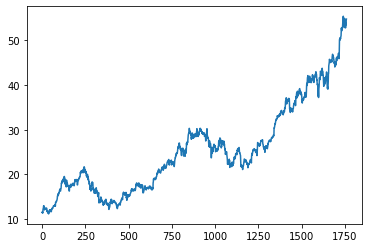

In [24]:
temp = np.array(price_train_imputed.loc[['AAPL']])[0]
plt.plot(temp)
plt.show()

## I.2 Qualitative data

### Stock ratio data

From Yahoo Finance can get other data besides stock price

In [25]:

downloading_ratio_data = False

with open('data/sp500_ratios_full.txt', 'r') as f:
    sp500_ratios = f.readlines()

sp500_ratios = [s.rstrip() for s in sp500_ratios]

# Downloading take ~ 40 mins
# [TO DO]: check the yfinance Tickers code for optimization
if downloading_ratio_data:
    from tqdm import tqdm
    from time import sleep
    
    print("Downloading ratio data ... \n")
    ratios = []
    for ticker in tqdm(yf.Tickers(sp500_tickers).tickers.values()):
        ratios.append( [ ticker.info.get(r, None) for r in sp500_ratios ] )
        sleep(0.01)
        
    # 
    data_ratios = pd.DataFrame(ratios, columns = sp500_ratios).set_index('symbol').sort_index()
    
    
    data_ratios.to_csv('data/sp500_ratios_full.csv')
        
else:
    data_ratios = pd.read_csv('data/sp500_ratios_full.csv', index_col=0)   

In [26]:
data_ratios.head()

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
symbol,,,,,,,,,,,,,,,,,,,,,
A,95051,Healthcare,16400.0,"Agilent Technologies, Inc. provides applicatio...",Santa Clara,800 227 9770,CA,United States,[],http://www.agilent.com,...,NaN,0.81,100.65,150.51,False,0.0045,1000,150.880,150.22,https://logo.clearbit.com/agilent.com
AAL,76155,Industrials,117400.0,"American Airlines Group Inc., through its subs...",Fort Worth,817 963 1234,TX,United States,[],http://www.aa.com,...,NaN,NaN,10.63,19.61,False,NaN,27000,20.250,19.61,https://logo.clearbit.com/aa.com
AAP,27604,Consumer Cyclical,40000.0,"Advance Auto Parts, Inc. provides automotive r...",Raleigh,540 362 4911,NC,United States,[],http://www.advanceautoparts.com,...,NaN,0.28,142.59,210.55,False,0.0193,900,213.240,210.32,https://logo.clearbit.com/advanceautoparts.com
AAPL,95014,Technology,147000.0,"Apple Inc. designs, manufactures, and markets ...",Cupertino,408-996-1010,CA,United States,[],http://www.apple.com,...,NaN,1.24,107.32,141.05,False,0.0062,1100,141.400,140.91,https://logo.clearbit.com/apple.com
ABBV,60064-6400,Healthcare,48000.0,"AbbVie Inc. discovers, develops, manufactures,...",North Chicago,847 932 7900,IL,United States,[],http://www.abbvie.com,...,NaN,4.26,79.11,108.56,False,0.0479,1000,109.035,108.53,https://logo.clearbit.com/abbvie.com


In [27]:
data_ratios.describe()

,fullTimeEmployees,maxAge,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,...,volume,fiftyTwoWeekHigh,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,dividendYield,bidSize,dayHigh,regularMarketPrice
count,4.880000e+02,490.0,490.000000,490.000000,490.000000,4.840000e+02,489.000000,490.000000,4.600000e+02,483.000000,...,4.900000e+02,490.000000,0.0,359.000000,490.000000,490.000000,381.000000,490.000000,490.000000,490.000000
mean,5.440168e+04,1.0,0.244451,0.132715,0.431665,4.157974e+09,0.397560,-0.058820,5.179833e+09,180.846874,...,3.803537e+06,223.855705,NaN,2.376100,138.479945,192.044551,0.021608,1309.795918,199.660175,198.311235
std,1.398079e+05,0.0,0.187220,0.190544,0.239122,1.117970e+10,0.841264,3.488427,1.046843e+10,356.035816,...,7.420485e+06,405.044611,NaN,1.346432,268.633891,362.613674,0.013767,2271.236062,370.789115,369.260634
min,1.630000e+02,1.0,-0.694850,-1.369510,-0.430510,-7.308200e+10,-0.998000,-61.771800,-7.660000e+09,5.000000,...,7.400000e+01,12.920000,NaN,0.020000,3.730000,0.000000,0.000100,800.000000,11.700000,11.670000
25%,9.195750e+03,1.0,0.136430,0.066170,0.279172,9.215230e+08,0.093000,0.113448,1.174750e+09,55.500000,...,7.607625e+05,67.755000,NaN,1.385000,39.417500,55.792500,0.011100,800.000000,60.317500,60.012500
50%,1.898750e+04,1.0,0.226375,0.122940,0.431675,1.845547e+09,0.210000,0.184035,2.264253e+09,102.000000,...,1.564794e+06,128.085000,NaN,2.250000,84.140000,109.240000,0.019500,900.000000,111.815000,110.890000
75%,5.238600e+04,1.0,0.356725,0.209300,0.597413,3.925250e+09,0.379000,0.266915,4.811380e+09,185.000000,...,3.585338e+06,235.460000,NaN,3.055000,150.515000,208.517500,0.028800,1200.000000,210.992500,209.397500
max,2.300000e+06,1.0,0.906300,1.404750,1.000000,1.040000e+11,10.554000,0.647680,1.110000e+11,5000.000000,...,7.473203e+07,5332.080000,NaN,10.460000,3868.010000,4600.000000,0.081800,36900.000000,4891.000000,4873.720000


In [28]:
data_ratios.columns

Index(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city',
       'phone', 'state', 'country', 'companyOfficers', 'website',
       ...
       'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid',
       'tradeable', 'dividendYield', 'bidSize', 'dayHigh',
       'regularMarketPrice', 'logo_url'],
      dtype='object', length=154)

### Preprocessing

Kept columns listed in 'sp500_ratios.txt'

In [29]:
# [TO DO] Finalize after picking features
with open('data/sp500_ratios.txt', 'r') as f:
    sp500_ratios_kept = f.readlines()

sp500_ratios_kept = [s.rstrip() for s in sp500_ratios_kept]

In [30]:
sp500_ratios_kept

['sector',
 'fullTimeEmployees',
 'city',
 'state',
 'country',
 'industry',
 'ebitdaMargins',
 'profitMargins',
 'grossMargins',
 'revenueGrowth',
 'operatingMargins',
 'earningsGrowth',
 'currentRatio',
 'returnOnAssets',
 'debtToEquity',
 'returnOnEquity',
 'quickRatio',
 'enterpriseToRevenue',
 'enterpriseToEbitda',
 'forwardEps',
 'trailingEps',
 'priceToBook',
 'shortRatio',
 'beta',
 'pegRatio',
 'forwardPE',
 'trailingPE',
 'payoutRatio']

Out of these, the first 6 will require further processing. 

In [31]:
data_ratios_processed = data_ratios[sp500_ratios_kept].copy()

#### Geographical data

These three columns: city, state and country contain geographical information.  
We drop city as this is too fine-grained, and combine state and country into a single column ('state_masked').  

In [32]:
len(data_ratios_processed['city'].unique())

232

In [33]:
len(data_ratios_processed['state'].unique())

39

In [34]:
data_ratios_processed['state_masked'] = \
    data_ratios_processed['state'].fillna('') + \
    data_ratios_processed['state'].isnull() * data_ratios_processed['country']

In [35]:
len(data_ratios_processed[data_ratios_processed['state_masked'].isna()]) == 0

True

In [36]:
len(data_ratios_processed['state_masked'].unique())

42

After that, we one-hot encode the new column. 

In [37]:
pd.get_dummies(data_ratios_processed['state_masked'])

,AL,AR,AZ,Bermuda,CA,CO,CT,DC,DE,FL,...,PA,RI,Switzerland,TN,TX,UT,United Kingdom,VA,WA,WI
symbol,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
AAP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAPL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABBV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZBH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZBRA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data_ratios_processed = pd.concat([data_ratios_processed, pd.get_dummies(data_ratios_processed['state_masked'])], axis=1)

In [39]:
data_ratios_processed.drop(['city', 'state', 'country', 'state_masked'], axis=1, inplace=True)

#### Sector and industry data

'industry' contains more fine-grain information compared to 'sector', thus here only keeping 'sector'

In [40]:
len(data_ratios_processed['sector'].unique())

11

In [41]:
len(data_ratios_processed['industry'].unique())

112

In [42]:
data_ratios_processed = pd.concat([data_ratios_processed, pd.get_dummies(data_ratios_processed['sector'])], axis=1)

In [43]:
data_ratios_processed.drop(['sector', 'industry'], axis=1, inplace=True)

#### Normalization of company size

Indicated by the number of full time employees. We take the log to reduce the range. 

In [44]:
data_ratios_processed['fullTimeEmployees'].describe()

count    4.880000e+02
mean     5.440168e+04
std      1.398079e+05
min      1.630000e+02
25%      9.195750e+03
50%      1.898750e+04
75%      5.238600e+04
max      2.300000e+06
Name: fullTimeEmployees, dtype: float64

In [45]:
def replaceWithLog(df, col_name):
    new_col_name = 'log_' + col_name
    df[new_col_name] = np.log(df[col_name])
    df.drop([col_name], axis=1, inplace=True)
    return df

In [46]:
data_ratios_processed = replaceWithLog(data_ratios_processed, 'fullTimeEmployees')

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


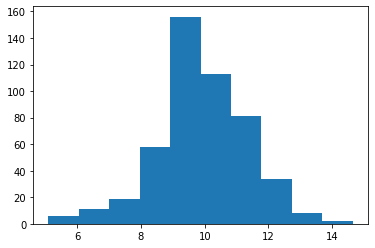

In [47]:
plt.hist(data_ratios_processed['log_fullTimeEmployees'])
plt.show()

In [48]:
def unit_standardization(X):
    return (X - np.min(X)) / (max(X) - min(X))

In [49]:
data_ratios_processed['log_fullTimeEmployees'] = unit_standardization(data_ratios_processed['log_fullTimeEmployees'])

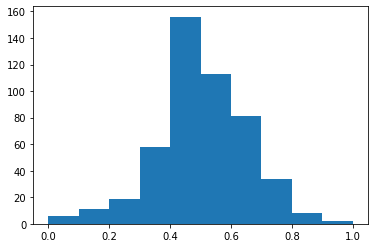

In [50]:
plt.hist(data_ratios_processed['log_fullTimeEmployees'])
plt.show()

#### Normalization of ratios

In [51]:
with pd.option_context("display.min_rows", 50, "display.max_rows", 100, \
                       "display.max_columns", 15, 'display.max_colwidth', 150):
    display(data_ratios_processed.describe().T)

,count,mean,std,min,25%,50%,75%,max
ebitdaMargins,490.0,0.244451,0.187220,-0.694850,0.136430,0.226375,0.356725,0.906300
profitMargins,490.0,0.132715,0.190544,-1.369510,0.066170,0.122940,0.209300,1.404750
grossMargins,490.0,0.431665,0.239122,-0.430510,0.279172,0.431675,0.597413,1.000000
revenueGrowth,489.0,0.397560,0.841264,-0.998000,0.093000,0.210000,0.379000,10.554000
operatingMargins,490.0,-0.058820,3.488427,-61.771800,0.113448,0.184035,0.266915,0.647680
earningsGrowth,377.0,4.834056,49.193289,-0.945000,0.065000,0.434000,1.122000,938.595000
currentRatio,464.0,2.082892,4.212951,0.092000,1.010750,1.407500,2.066000,80.168000
returnOnAssets,488.0,0.061163,0.055910,-0.129520,0.025093,0.050680,0.086645,0.296530
debtToEquity,445.0,178.916649,397.666583,0.352000,47.128000,84.129000,154.108000,4755.983000
returnOnEquity,471.0,0.553503,3.054406,-4.469200,0.076560,0.154110,0.285485,40.818558


The goals of normalization are:  
1) Bringing all columns to the same scale ~ [0, 1]  
2) While keeping the distributions intact

Those already have good range are kept intact. The rest are either norm-standardized or log transformed. 

To see why sometimes log transform is important, consider the following column:  **'currentRatio'**

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


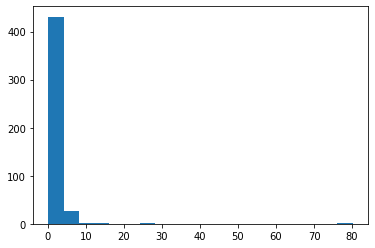

In [52]:
plt.hist(np.array(data_ratios_processed['currentRatio']), bins=20)
plt.show()

All values are positive, most between 0 and 10.  
Take the log to see if a better distribution emerges?

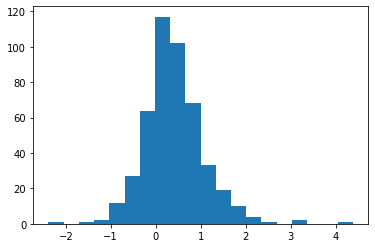

In [53]:
plt.hist(np.log(np.array(data_ratios_processed['currentRatio'])), bins=20)
plt.show()

Clearly the log transformation capture the normal distribution better. 

The columns that are log-transformed: 

In [54]:
to_log_transform = [
    'currentRatio', 'debtToEquity', 'quickRatio', 'shortRatio'
]

In [55]:
for ratio in to_log_transform: 
    data_ratios_processed = replaceWithLog(data_ratios_processed, ratio)

The columns that are norm-standardized:  

In [56]:
to_standardize = [
    'returnOnEquity', 'enterpriseToRevenue', 'enterpriseToEbitda', 'forwardEps', 
    'trailingEps', 'priceToBook', 'pegRatio', 'forwardPE', 'trailingPE', 'payoutRatio'
]

In [57]:
for ratio in to_standardize: 
    data_ratios_processed[ratio] = norm_standardization(data_ratios_processed[ratio])

The columns that are omitted:    

In [58]:
data_ratios_processed.drop(['earningsGrowth', 'priceToBook', 'trailingPE'], axis=1, inplace=True) # lack of data

Summary

In [59]:
with pd.option_context("display.min_rows", 50, "display.max_rows", 100, \
                       "display.max_columns", 15, 'display.max_colwidth', 150):
    display(data_ratios_processed.describe().T)

,count,mean,std,min,25%,50%,75%,max
ebitdaMargins,490.0,2.444513e-01,0.187220,-0.694850,0.136430,0.226375,0.356725,0.906300
profitMargins,490.0,1.327154e-01,0.190544,-1.369510,0.066170,0.122940,0.209300,1.404750
grossMargins,490.0,4.316647e-01,0.239122,-0.430510,0.279172,0.431675,0.597413,1.000000
revenueGrowth,489.0,3.975603e-01,0.841264,-0.998000,0.093000,0.210000,0.379000,10.554000
operatingMargins,490.0,-5.881977e-02,3.488427,-61.771800,0.113448,0.184035,0.266915,0.647680
returnOnAssets,488.0,6.116250e-02,0.055910,-0.129520,0.025093,0.050680,0.086645,0.296530
returnOnEquity,471.0,-1.842269e-17,1.001063,-1.646161,-0.156315,-0.130899,-0.087841,13.196630
enterpriseToRevenue,490.0,1.603026e-17,1.001022,-0.483856,-0.202185,-0.131083,-0.022512,16.986009
enterpriseToEbitda,460.0,4.440892e-17,1.001089,-4.907167,-0.374580,-0.181341,0.154941,8.793328
forwardEps,478.0,-8.419578e-17,1.001048,-0.490483,-0.291912,-0.169411,0.035394,18.193763


#### Filling NAs

For now, fill by mean

In [60]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [61]:
def impute(df, by_col=True):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    if by_col:
        return pd.DataFrame(imp_mean.fit_transform(df), index = df.index, columns = df.columns)
    return pd.DataFrame(imp_mean.fit_transform(df.T), index = df.T.index, columns = df.T.columns).T

In [62]:
data_ratios_imputed = impute(data_ratios_processed)

### Dimensional reduction with PCA

In [63]:
data_ratios_imputed.shape
pca_ratios = PCA(n_components = 10)
pca_ratios.fit(data_ratios_imputed)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pca_ratios.explained_variance_ratio_

array([0.51194338, 0.07904085, 0.06345355, 0.05565665, 0.04286303,
       0.03966518, 0.0333434 , 0.0285459 , 0.02603715, 0.02082912])

In [65]:
np.sum(pca_ratios.explained_variance_ratio_)

0.901378209302846

In [66]:
data_ratios_reduced = pd.DataFrame(pca_ratios.fit_transform(data_ratios_imputed), index=data_ratios_imputed.index)
data_ratios_reduced.shape

(490, 10)

### Visualization

In [67]:
data_ratios_viz = data_ratios[sp500_ratios_kept].copy()

In [68]:
with pd.option_context("display.min_rows", 50, "display.max_rows", 100, \
                       "display.max_columns", 50, 'display.max_colwidth', 150):
    display(data_ratios_viz.groupby('sector').agg(['mean', 'std']))

fullTimeEmployees                ebitdaMargins  \
                                    mean            std          mean   
sector                                                                  
Basic Materials             23284.263158   19646.563666      0.272537   
Communication Services      63960.833333   66506.972886      0.238241   
Consumer Cyclical           92851.919355  185492.530640      0.145510   
Consumer Defensive         146339.558824  398447.561102      0.209031   
Energy                      20279.304348   25900.802135      0.270199   
Financial Services          36671.106061   54666.635993      0.167424   
Healthcare                  49813.870968   60502.614992      0.265056   
Industrials                 57212.971429   81315.031450      0.180187   
Real Estate                  6386.233333   18297.568157      0.516122   
Technology                  47466.357143   93366.702082      0.287076   
Utilities                   12281.285714    7229.409990      0.376908   

                                 profitMargins           grossMargins  \
                             std          mean       std         mean   
sector                                                                  
Basic Materials         0.091865      0.141531  0.080662     0.337415   
Communication Services  0.223977      0.070199  0.278104     0.525723   
Consumer Cyclical       0.108400      0.050755  0.219679     0.372684   
Consumer Defensive      0.119267      0.109944  0.078327     0.387091   
Energy                  0.191732     -0.037804  0.306066     0.391847   
Financial Services      0.200532      0.242672  0.119996     0.344816   
Healthcare              0.133559      0.167405  0.216823     0.514377   
Industrials             0.210911      0.083495  0.140600     0.313447   
Real Estate             0.232597      0.188722  0.254604     0.598970   
Technology              0.120677      0.185734  0.105622     0.562493   
Utilities               0.087428      0.123026  0.089925     0.448423   

                                 revenueGrowth           operatingMargins  \
                             std          mean       std             mean   
sector                                                                      
Basic Materials         0.105821      0.452368  0.424983         0.183598   
Communication Services  0.155289      0.517542  1.349908         0.144181   
Consumer Cyclical       0.185419      0.650286  1.631852        -1.827318   
Consumer Defensive      0.167427      0.110588  0.164203         0.178105   
Energy                  0.250944      1.156826  0.907821         0.056465   
Financial Services      0.333283      0.471485  0.717436         0.324829   
Healthcare              0.217210      0.285919  0.261056         0.204389   
Industrials             0.218090      0.389014  0.753651         0.123938   
Real Estate             0.223943      0.104533  0.235156         0.236171   
Technology              0.202832      0.249371  0.185857         0.222888   
Utilities               0.108979      0.192429  0.557004         0.221349   

                                 earningsGrowth             currentRatio  \
                             std           mean         std         mean   
sector                                                                     
Basic Materials         0.058251       3.710625    6.482682     2.075105   
Communication Services  0.266434       0.888471    1.895190     1.858042   
Consumer Cyclical       9.597390       5.402342   15.204007     2.088841   
Consumer Defensive      0.117297       0.144793    0.489498     1.246000   
Energy                  0.156346     157.429833  382.697835     1.377870   
Financial Services      0.154363       3.297426    9.216295     2.248256   
Healthcare              0.116179       1.444542    4.710234     2.110790   
Industrials             0.217513       0.905564    1.504687     1.668710   
Real Estate             0.282839       1.707259    2.976602   

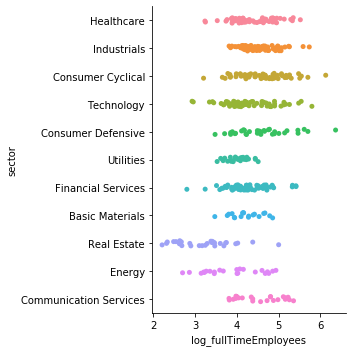

In [69]:
data_ratios_viz['log_fullTimeEmployees'] = np.log10(data_ratios_viz['fullTimeEmployees'])
sns.catplot(y='sector', x='log_fullTimeEmployees', data=data_ratios_viz)
plt.show()

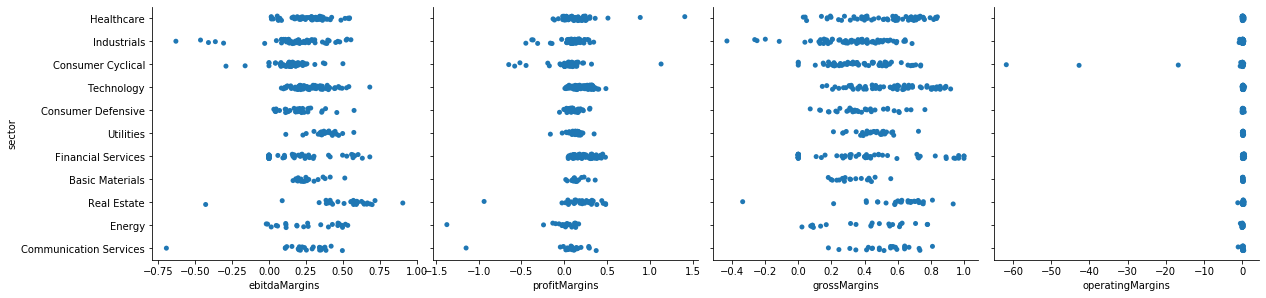

In [70]:
g = sns.PairGrid(data_ratios_viz, y_vars=['sector'], x_vars=['ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingMargins'], height=4)
g.map(sns.stripplot)
plt.show()

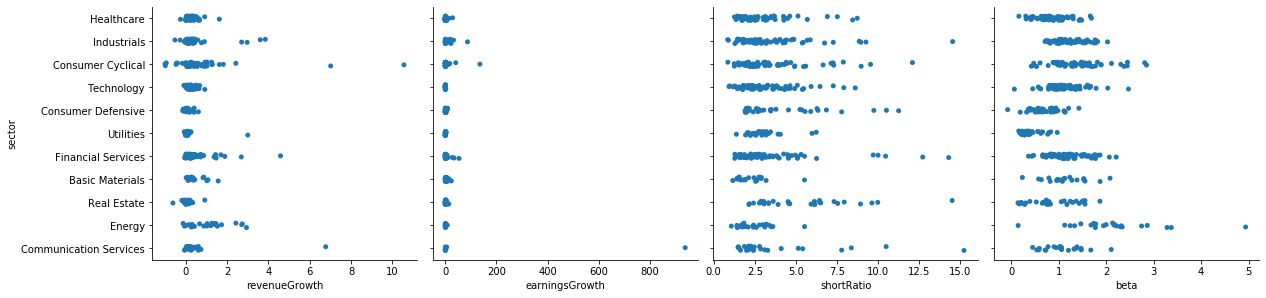

In [71]:
g = sns.PairGrid(data_ratios_viz, y_vars=['sector'], x_vars=['revenueGrowth', 'earningsGrowth', 'shortRatio', 'beta'], height=4)
g.map(sns.stripplot)
plt.show()

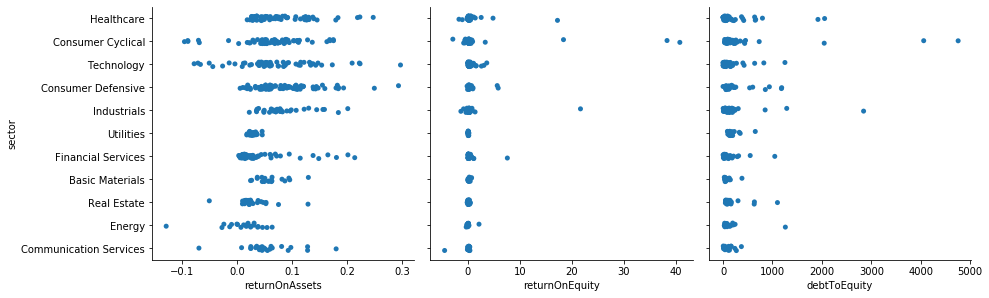

In [72]:
g = sns.PairGrid(data_ratios_viz, y_vars=['sector'], x_vars=['returnOnAssets', 'returnOnEquity', 'debtToEquity'], height=4)
g.map(sns.stripplot)
plt.show()

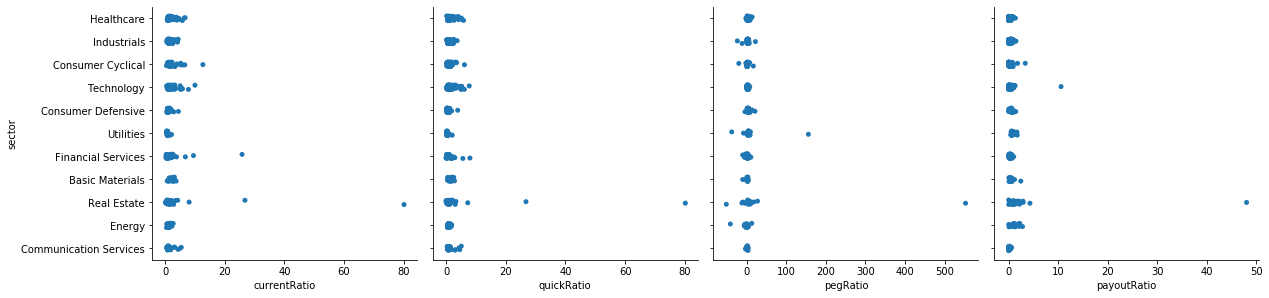

In [73]:
g = sns.PairGrid(data_ratios_viz, y_vars=['sector'], x_vars=['currentRatio', 'quickRatio', 'pegRatio', 'payoutRatio'], height=4)
g.map(sns.stripplot)
plt.show()

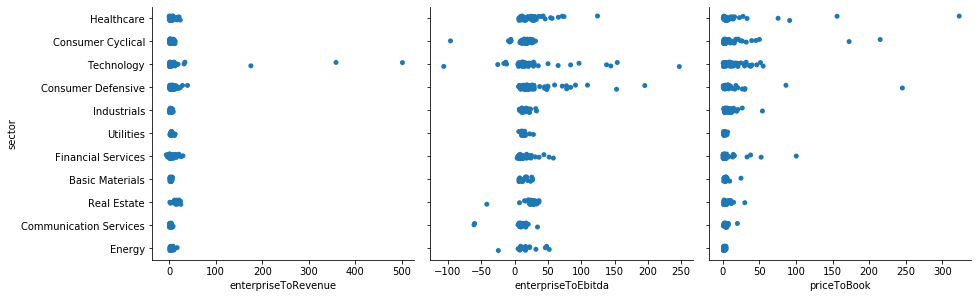

In [74]:
g = sns.PairGrid(data_ratios_viz, y_vars=['sector'], x_vars=['enterpriseToRevenue', 'enterpriseToEbitda', 'priceToBook'], height=4)
g.map(sns.stripplot)
plt.show()

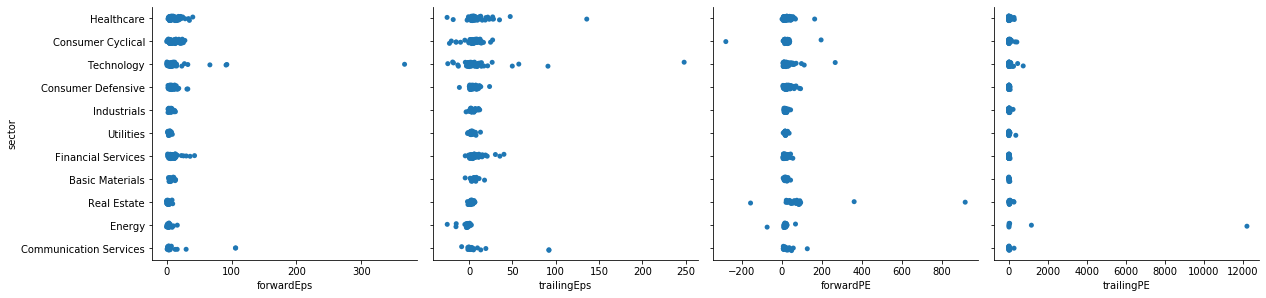

In [75]:
g = sns.PairGrid(data_ratios_viz, y_vars=['sector'], x_vars=['forwardEps', 'trailingEps', 'forwardPE', 'trailingPE'], height=4)
g.map(sns.stripplot)
plt.show()

## I.4 Combining stock and ratio data

In [76]:
data_reduced = pd.concat([price_train_reduced, data_ratios_reduced], axis=1)
data_reduced.columns = [i for i in range(30)] 

In [77]:
data_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
symbol,,,,,,,,,,,,,,,,,,,,,
A,-7.653267,-8.092004,-3.032925,4.923556,1.718242,0.048315,-0.476939,-4.086221,-1.161511,-0.669310,...,-0.283397,0.333993,-0.771254,0.054505,0.301414,-0.032547,0.204908,0.004255,-0.366563,-0.162828
AAL,-0.236684,15.336516,-7.359696,0.136204,8.186768,2.330969,-0.043794,-2.186582,2.097643,3.495275,...,0.297576,-0.575209,-0.347619,-4.644976,-0.967625,-0.845389,-1.779881,-1.064154,3.923018,-2.366965
AAP,8.333476,27.774905,5.723181,-13.744104,-3.399832,9.414269,-1.634854,6.287597,0.422440,2.129308,...,-0.182377,-0.280493,0.666651,-0.068677,-0.467710,0.017897,-0.108737,-0.362034,0.041149,0.271891
AAPL,-7.829236,-8.279677,0.552062,-6.524639,5.580664,1.789239,5.117675,1.062283,-0.388929,1.944206,...,-0.319546,-0.553172,0.384104,-0.306673,0.568150,-0.107680,-0.167824,-0.123858,-0.263431,-0.087668
ABBV,-3.882760,-20.670458,10.341656,-7.063682,9.235073,3.749727,-1.525930,-7.987034,5.808235,-0.498483,...,-0.383957,-1.290175,1.468161,-0.412084,0.209275,-0.078135,-0.758245,0.256878,-0.457533,-0.399594


## II Clustering

### II.1 K-mean

In [78]:
from sklearn.cluster import KMeans

In [79]:
X = np.array(data_reduced)
kmeans = KMeans(n_clusters=8, random_state=4).fit(X)

In [80]:
freq = np.array(np.unique(kmeans.labels_, return_counts=True))
freq = freq[:, freq[1, :].argsort()] 

In [81]:
min(freq[1])

18

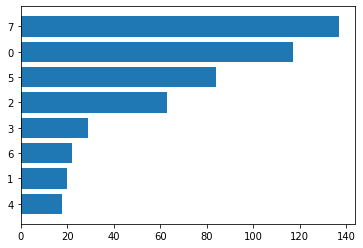

In [82]:
fig, ax = plt.subplots()
ax.barh([str(f) for f in freq[0]], freq[1])
plt.show()

### II.2 Picking number of cluster

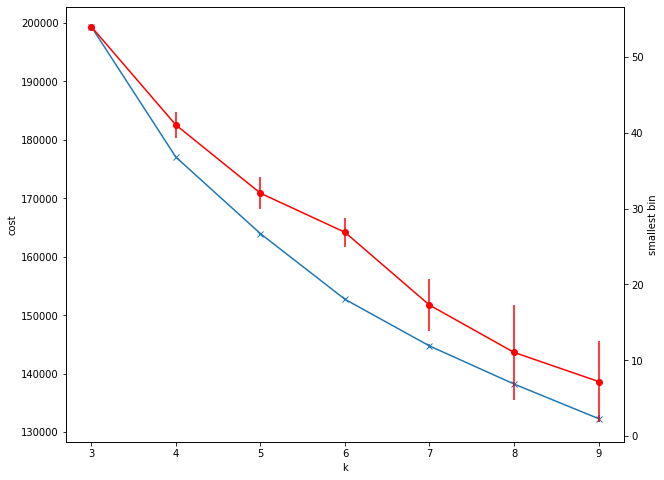

In [83]:
costs = []
k_range = list(range(3, 10))
n = 25

for i in range(n):
    cost_n = []
    for k in k_range:
        k_means = KMeans(n_clusters=k).fit(X)
        cost_n.append([k_means.inertia_, min(np.unique(k_means.labels_, return_counts=True)[1])])
    cost_n = np.transpose(cost_n)
    costs.append(cost_n)
    
costs_mean = np.average(np.array(costs), axis=0)
costs_std = np.std(np.array(costs), axis=0)

fig, ax = plt.subplots(1, 1, figsize =(10, 8))
ax2 = ax.twinx()

ax.errorbar(k_range, costs_mean[0], yerr=costs_std[0], marker='x')
ax.set_xlabel('k')
ax.set_ylabel('cost')

ax2.errorbar(k_range, costs_mean[1], yerr=costs_std[1], c='red', marker='o')
ax2.set_ylabel('smallest bin')

plt.show()

k=7 or 8 seems to be stable

### II.3 Visualization

In [84]:
stock_labels = pd.DataFrame(kmeans.labels_, index=price_train_imputed.index, columns=['label'])

In [85]:
labels, count = np.unique(kmeans.labels_, return_counts=True)

In [86]:
price_train_imputed[stock_labels['label']==5].sample(5)

,10/3/2011,10/4/2011,10/5/2011,10/6/2011,10/7/2011,10/10/2011,10/11/2011,10/12/2011,10/13/2011,10/14/2011,...,9/17/2018,9/18/2018,9/19/2018,9/20/2018,9/21/2018,9/24/2018,9/25/2018,9/26/2018,9/27/2018,9/28/2018
RTX,34.346481,34.435616,34.470280,35.148685,35.386387,36.520393,36.515415,36.763020,36.416382,36.961090,...,80.480980,81.544243,82.081718,82.870399,83.004784,81.988251,81.620201,81.532555,81.602669,81.678619
MGM,7.776478,8.258376,8.248926,8.957594,8.513498,9.061535,9.288311,9.430044,9.637920,9.656818,...,26.589706,26.754559,27.510941,27.666101,27.627308,27.064871,27.026081,26.764257,26.880623,27.064871
EOG,30.184643,32.501095,33.886566,34.654301,33.048229,35.038189,35.360283,35.717678,35.465675,37.127995,...,108.719505,110.486175,111.152138,110.264175,110.495415,114.685471,116.211662,115.906410,117.469612,117.996826
CBRE,13.090000,13.510000,13.840000,14.390000,13.510000,14.150000,13.950000,15.170000,15.000000,15.220000,...,45.730000,45.709999,44.900002,45.740002,45.459999,45.250000,44.540001,44.330002,44.200001,44.099998
NSC,47.533073,48.911289,50.154869,51.842011,51.382610,53.426205,53.236076,53.418270,53.101433,53.996475,...,169.641144,176.661820,175.687271,174.362610,174.324783,172.687882,172.536469,170.861725,172.517532,170.786011


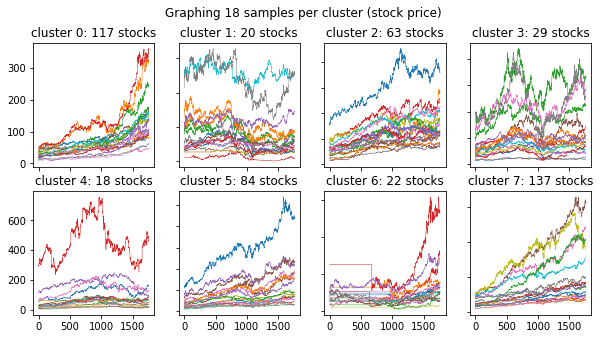

In [87]:
n_sample = 18
d_row = 2; d_col = 4

fig, axs = plt.subplots(d_row, d_col, figsize=(10, 5))
fig.suptitle('Graphing ' + str(n_sample) + ' samples per cluster (stock price)')

for l in labels:
    data = price_train_imputed[stock_labels['label']==l].sample(n_sample)
    axs[l//d_col, l%d_col].plot(np.array(data).T, linewidth=0.5)
    axs[l//d_col, l%d_col].set_title('cluster ' + str(l) + ': ' + str(count[l]) + ' stocks')
    
for ax in fig.get_axes():
    ax.label_outer()

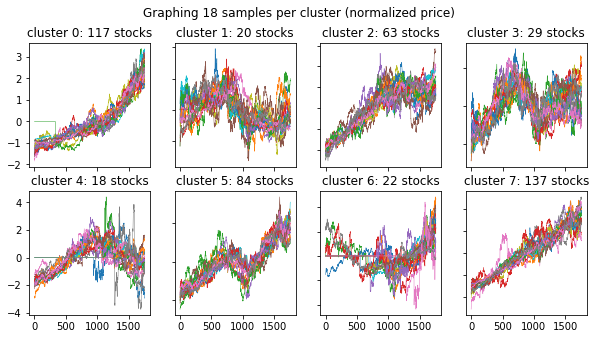

In [88]:
fig, axs = plt.subplots(d_row, d_col, figsize=(10, 5))
fig.suptitle('Graphing ' + str(n_sample) + ' samples per cluster (normalized price)')

for l in labels:
    data = price_train_normalized[stock_labels['label']==l].sample(n_sample)
    axs[l//d_col, l%d_col].plot(np.array(data).T, linewidth=0.5)
    axs[l//d_col, l%d_col].set_title('cluster ' + str(l) + ': ' + str(count[l]) + ' stocks')
    
for ax in fig.get_axes():
    ax.label_outer()

In [89]:
#for l in labels:
#    print('cluster ' + str(l) + ': ' + str(count[l]) + ' stocks')
#    display(
#        pd.DataFrame(
#            np.unique(data_ratios[stock_labels['label']==l]['sector'], return_counts=True)
#        ).style.hide_index().hide_columns()
#    )

In [90]:
temp3 = pd.concat([stock_labels, pd.get_dummies(data_ratios['sector'])], axis=1)
temp3.groupby(['label']).agg('sum').T.style.background_gradient(cmap='Blues')

label,0,1,2,3,4,5,6,7
Basic Materials,2,2,1,1,0,5,1,7
Communication Services,5,6,3,1,1,1,0,7
Consumer Cyclical,15,1,8,5,6,8,4,16
Consumer Defensive,2,0,15,0,1,1,1,14
Energy,3,7,0,8,0,4,1,0
Financial Services,10,0,2,2,0,30,3,20
Healthcare,24,1,14,0,6,3,1,13
Industrials,16,0,7,5,3,19,3,17
Real Estate,2,1,8,1,1,4,0,13
Technology,37,2,2,4,0,8,7,10
